Keras Recurrent Neural Nets

In [1]:
import load

In [20]:
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.layers.recurrent import Recurrent
from keras.optimizers import SGD, Adam, RMSprop
from keras.utils import np_utils
from keras.layers import LSTM

from keras.layers.recurrent import SimpleRNN

from keras.layers.embeddings import Embedding
#import backend as K?

import matplotlib.pyplot as plt
plt.ion()

In [21]:
from tqdm import tqdm

In [22]:
import pickle
train, test, dicts = pickle.load(open("atis.pkl"))

In [23]:
#inversting the dictionary

idx2words = dict((v,k) for k, v in dicts[b'words2idx'].items())

In [24]:
#inversting the dictionary

idx2labels = dict((v,k) for k, v in dicts[b'labels2idx'].items())

In [25]:
list(map(lambda x: idx2words[x], train[0][0]))

['i',
 'want',
 'to',
 'fly',
 'from',
 'boston',
 'at',
 'DIGITDIGITDIGIT',
 'am',
 'and',
 'arrive',
 'in',
 'denver',
 'at',
 'DIGITDIGITDIGITDIGIT',
 'in',
 'the',
 'morning']

In [26]:
w =5

In [27]:
longest = np.max(list(map(len, train[0])))

In [28]:
nlabels = len(idx2labels)

In [29]:
def contextwin(l, win):
    '''
    win :: int corresponding to the size of the window
    given a list of indexes composing a sentence

    l :: array containing the word indexes

    it will return a list of list of indexes corresponding
    to context windows surrounding each word in the sentence
    '''
    assert (win % 2) == 1
    assert win >= 1
    l = list(l)

    lpadded = win // 2 * [-1] + l + win // 2 * [-1]
    out = [lpadded[i:(i + win)] for i in range(len(l))]

    assert len(out) == len(l)
    return out

In [30]:
#from tqdm import tqdm #for progress bars

train_w = [contextwin(t,w) for t in tqdm(train[0])] 
#train_w = [contextwin(t,w) for t in train[0]] 
test_w = [contextwin(t,w) for t in test[0]]

train_hot = [np_utils.to_categorical(t, nlabels) for t in train[2]] 
test_hot = [np_utils.to_categorical(t, nlabels) for t in test[2]]

100%|██████████| 4978/4978 [00:00<00:00, 42995.74it/s]


In [31]:
contextwin(train[0][0],5)

[[-1, -1, 232, 542, 502],
 [-1, 232, 542, 502, 196],
 [232, 542, 502, 196, 208],
 [542, 502, 196, 208, 77],
 [502, 196, 208, 77, 62],
 [196, 208, 77, 62, 10],
 [208, 77, 62, 10, 35],
 [77, 62, 10, 35, 40],
 [62, 10, 35, 40, 58],
 [10, 35, 40, 58, 234],
 [35, 40, 58, 234, 137],
 [40, 58, 234, 137, 62],
 [58, 234, 137, 62, 11],
 [234, 137, 62, 11, 234],
 [137, 62, 11, 234, 481],
 [62, 11, 234, 481, 321],
 [11, 234, 481, 321, -1],
 [234, 481, 321, -1, -1]]

In [32]:
train_w[0]

[[-1, -1, 232, 542, 502],
 [-1, 232, 542, 502, 196],
 [232, 542, 502, 196, 208],
 [542, 502, 196, 208, 77],
 [502, 196, 208, 77, 62],
 [196, 208, 77, 62, 10],
 [208, 77, 62, 10, 35],
 [77, 62, 10, 35, 40],
 [62, 10, 35, 40, 58],
 [10, 35, 40, 58, 234],
 [35, 40, 58, 234, 137],
 [40, 58, 234, 137, 62],
 [58, 234, 137, 62, 11],
 [234, 137, 62, 11, 234],
 [137, 62, 11, 234, 481],
 [62, 11, 234, 481, 321],
 [11, 234, 481, 321, -1],
 [234, 481, 321, -1, -1]]

In [33]:
model = Sequential()
model.add(Embedding(len(idx2words)+1, 1024, input_length = w))
model.add(LSTM(16))
#model.add(Activation('sigmoid'))
model.add(Dense(nlabels))
model.add(Activation('softmax'))
sgd = SGD()

In [34]:
%time model.compile(loss='categorical_crossentropy', optimizer=RMSprop(), metrics=['accuracy'])

CPU times: user 17.8 ms, sys: 2.79 ms, total: 20.6 ms
Wall time: 19.6 ms


In [35]:
#h = model.fit(train_w[0], train_hot[0], batch_size =128, nb_epoch=3, show_accuracy = True, validation_data = (X_test, Y_test), verbose=1)

https://github.com/fchollet/keras/blob/master/examples/babi_rnn.py

In [36]:
#How many times we get it wrong
errs = np.sum([len(np.nonzero(model.predict_classes(tw)-t)[0])for tw, t in zip(test_w, test[2])])
                  
num_words = np.sum(list(map(len, test[2])))


10/10 [==============================] - 0s


In [37]:
float(errs) / (num_words)                

0.9971732985431615

In [39]:
model.predict(test_w[0])

array([[ 0.00793751,  0.0079035 ,  0.00791494, ...,  0.00789318,
         0.00787809,  0.00783674],
       [ 0.00791369,  0.00789422,  0.00790282, ...,  0.00788931,
         0.00783819,  0.00786464],
       [ 0.00787013,  0.00783722,  0.00789602, ...,  0.00790313,
         0.00781236,  0.00785355],
       ..., 
       [ 0.00781939,  0.00783641,  0.00793078, ...,  0.00794724,
         0.00800801,  0.00774111],
       [ 0.0078746 ,  0.00780205,  0.00790347, ...,  0.00800247,
         0.0080154 ,  0.00774578],
       [ 0.00790134,  0.00779787,  0.00791296, ...,  0.00803498,
         0.0080271 ,  0.00774751]], dtype=float32)

In [40]:
model.predict_classes(test_w[0])

19/19 [==============================] - 0s


array([110, 111,  61,  96,  25,  25,  51, 113, 113,  66,  15, 125, 125,
       123, 123, 123, 123,  96,  51])

In [41]:
test[2][0]

array([126, 126, 126, 126, 126, 126, 126, 126,  48, 126,  78, 123, 126,
       126, 126, 126, 126,  71, 119], dtype=int32)

In [42]:
#input: temp, precipitation, windspeed
http://www.wrh.noaa.gov/pqr/climate/PDXpcpn.txt
#output: season class (winter, spring, summer, fall)

In [45]:
temps = (np.sin(np.arange(365)*2*np.pi/365) + np.random.rand(365)*0.3 +1) * 35

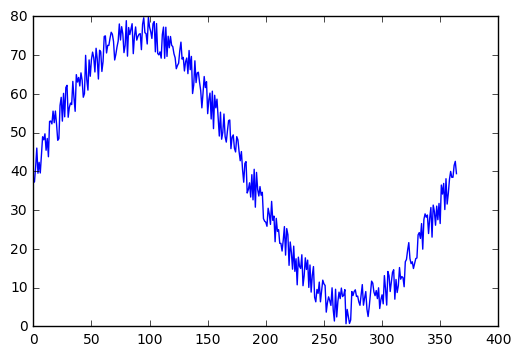

In [46]:
plt.plot(temps)

In [47]:
rain_str = '2012 1PR    0   T   T  16   2  12   T   0  30   2   0   0   0  13   T   8  59  99 191  60   5  35   0  94   1  11   0   0  44   T   T'

In [51]:
def parse_rain(s):
    month_rain=[]
    for amt in s[8:].strip().split():
        if amt == 'T':
            month_rain.append(0)
        elif amt == 'M':
            continue
        else:
            month_rain.append(int(amt))
    return month_rain

In [52]:
with open('rain.txt','r') as f:
    all_rain = []
    for month in f:
        all_rain.extend(parse_rain(month))
        

In [57]:
precips = np.array(all_rain + [0 for i in range(365-len(all_rain))])

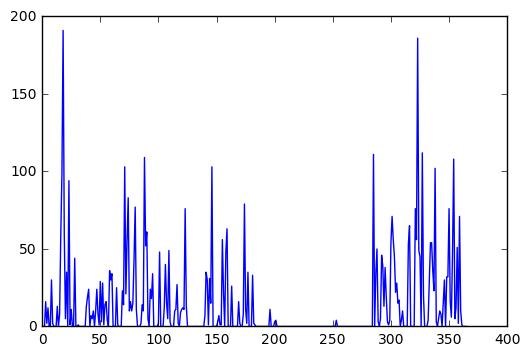

In [58]:
plt.plot(precips)

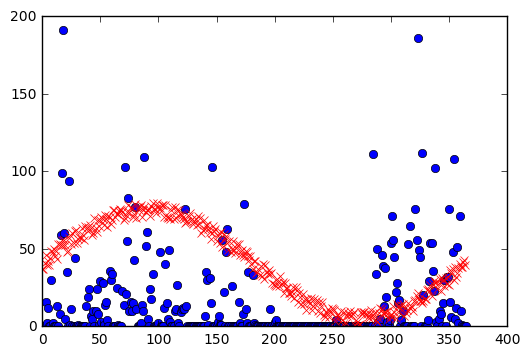

In [59]:
plt.plot(precips, 'bo')
plt.plot(temps, 'rx')

In [62]:
labels = np.zeros([365,4])

In [64]:
labels[:90, :] = np.array([1,0,0,0])
labels[90:180, :] = np.array([0,1,0,0])
labels[180:270, :] = np.array([0,0,1,0])
labels[270:, :] = np.array([0,0,0,1])

In [65]:
data = np.zeros([365,2])
data[:,0] = temps
data[:,1] = precips

ValueError: could not broadcast input array from shape (366) into shape (365)

In [68]:
model = Sequential()
#model.add(Embedding(len(idx2words)+1, 1024, input_length = w))
model.add(LSTM(16, input_shape=[2, 1]))
model.add(Dense(4))
model.add(Activation('softmax'))
sgd = SGD()